### Zadanie 1 - Paradoks Simpsona##

Paradoks Simpsona mówi o tym, że badając pewne zjawisko możemy otrzymywać inne wyniki w przypadku rozpatrywania badanych grup odzielnie a inne, często odwrotne, jeśli dokonamy połączenia badanych grup.

#### Przykład:  Psy czy koty? ####

Chcemy sprawdzić które ze zwierzaków są bardziej popularne, więc przepytujemy znajomych. Wśród nich mamy zarówno kobiety jak i mężczyzn, więc dzielimy wyniki naszego wywiadu na dwie grupy. Okazuje się, że wśród naszych kolegów psy cieszą się dużo większą popularnością - aż 80%, podczas gdy tylko 40% koleżanek preferuje psy. Tak więc koty lubi zaledwie 20% naszych przyjaciół oraz 60% przyjaciółek. Wydawać by się mogło, że większość naszych przyjaciół wolałaby mieć psa. Jednak po podsumowaniu wyników okazuje się, że podział na fanów kotów i psów wśród znajomych jest prawie 50:50.

In [31]:
import pandas as pd
import numpy as np
col = ['M', 'K', 'Razem']
zw = ['Psy', 'Koty']
df = pd.DataFrame(np.array(['80%', '40%', '48%' ,'20%', '60%', '52%']).reshape((2,3)), columns=col, index = zw)
df

,M,K,Razem
Psy,80%,40%,48%
Koty,20%,60%,52%


Skąd taka różnica? Wynika z różnej liczebności obu grup: kolegów mamy łącznie 5 a koleżanek aż 20.

In [30]:
df2 = pd.DataFrame(np.array([4, 8, 12, 1, 12, 13]).reshape((2,3)), columns=col, index=zw)
df2

,M,K,Razem
Psy,4,8,12
Koty,1,12,13


#### Wpływ na metody pomiaru kampanii marketingowych ####

Wystarczy, że w powyższym przykładzie zastąpimy Psy i Koty dwiema kampaniami marketingowymi przeprowadzanymi na różnych grupach docelowych - chociażby na mężczyznach i kobietach. Jeśli uznamy, że na pierwszą kampanię marketingową odpowiedziało 80% mężczyzn i 40% kobiet a na drugą 20% mężczyzn i 60% kobiet, bez podawania liczebności każdej z płci możemy otrzymać błędne oszacowanie skuteczności kampanii - które w rzeczywistości są prawie tak samo skuteczne.

---

### Zadanie 2 - Raport skuteczności kampanii marketingowej ###

Aby ocenić skuteczność kampanii marketingowej musimy sprawdzić, czy średnia wartość zakupów w serwisie Allegro w okresie od 1 lutego do 31 marca była istotnie większa wśród osób do których skierowano kampanię w porównaniu do tych, do których nie wysłano materiałów zachęcających do dokonania zakupów.

1\. Stworzenie zbioru składającego się z klientów, którzy zrobili zakupy na Allegro w ciągu tych dwóch miesięcy wraz z sumaryczną kwotą wydatków w tym okresie:
Wybranie tych dla których ID_Sklepu = alg oraz Data_Trx zawiera się w ('2013-02-01','2013-03-31')

2\. Podział na dwa zbiory - jeden zawierający grupę kontrolną a drugi grupę odbiorców materiałów promocyjnych. 

3\. Dla każdego z dwóch nowych zbiorów policzenie dla każdego klienta kwoty którą wydał w ciagu tych dwóch miesięcy za pomocą połączenia ze zbiorem z transakcjami.

4\. Porównanie średnich dla obu grup - kontrolnej i odbiorców. Grupa osób do których wysłano materiały powinna mieć większą średnią wartość zakupów jeśli chcemy uznać kampanię za skuteczną.

In [38]:
x1 = pd.ExcelFile('zadanie.xlsx')
x1.sheet_names

[u'Tabela_transakcje', u'Tabela_historia_wysylki']

In [42]:
trans = x1.parse('Tabela_transakcje')
hist = x1.parse('Tabela_historia_wysylki')
trans.head()

,ID_KLIENTA,ID_SKLEPU,DATA_TRX,KWOTA,PUNKTY
0,486,bp,2013-05-11,346.30,519
1,874,bp,2013-03-21,174.96,87
2,874,bp,2013-04-10,137.92,68
3,1844,real,2013-01-04,95.80,47
4,2426,real,2013-02-20,158.82,79


In [120]:
allegro = trans.loc[trans['ID_SKLEPU']=='alg']
allegro = allegro.loc[allegro['DATA_TRX'].isin(pd.date_range('2013-02-01', '2013-03-31'))]

In [121]:
all_sum = pd.DataFrame(allegro.groupby('ID_KLIENTA', as_index=False)['KWOTA'].sum())

In [119]:
hist.head()

,ID_KLIENTA,STATUS_WYSYLKI
0,5045,GRUPA_KONTROLNA
1,5627,WYSLANO
2,5918,WYSLANO
3,8828,WYSLANO
4,13678,WYSLANO


In [124]:
gr_kontr = hist.loc[hist['STATUS_WYSYLKI']=='GRUPA_KONTROLNA'] #stworzenie zbioru dla grupy kontrolnej
gr_odb = hist.loc[hist['STATUS_WYSYLKI']=='WYSLANO'] #stworzenie zbioru odbiorców kampanii
gr_kontr_sum = pd.merge(gr_kontr, all_sum, on='ID_KLIENTA', how='left') #zbiór z sumami wydatków dla grupy kontrolnej
_ = gr_kontr_sum['KWOTA'].fillna(0, inplace=True) # zastąpienie brakujących wartości zerami
gr_odb_sum = pd.merge(gr_odb, all_sum, on='ID_KLIENTA', how='left') #zbiór z sumami dla grupy odbiorców
_ = gr_odb_sum['KWOTA'].fillna(0, inplace=True) #zastąpienie brakujących wartości
srednia = gr_odb_sum['KWOTA'].mean() - gr_kontr_sum['KWOTA'].mean() # porównanie średnich
mediana = gr_odb_sum['KWOTA'].median() - gr_kontr_sum['KWOTA'].median()
print 'Średnia w grupie odbiorców różni się od średniej w grupie kontrolnej o {} złotych.'.format(round(srednia,2))
print 'Różnica wartości median dla obu grup wynosi {} złotych.'.format(round(mediana, 2))

Średnia w grupie odbiorców różni się od średniej w grupie kontrolnej o -17.01 złotych.
Różnica wartości median dla obu grup wynosi 0.0 złotych.


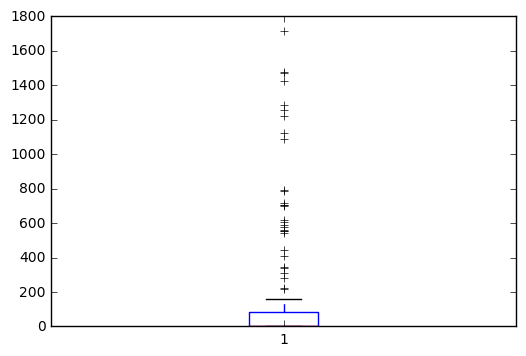

In [132]:
import matplotlib.pyplot as plt
plt.boxplot(gr_odb_sum['KWOTA'])
plt.show()

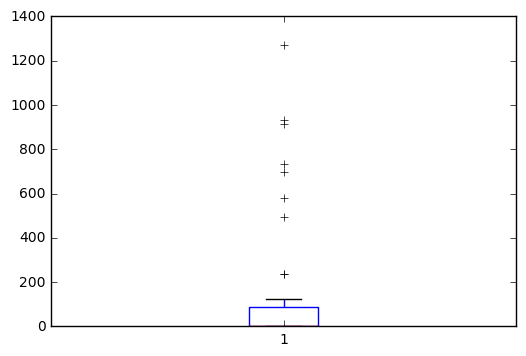

In [133]:
plt.boxplot(gr_kontr_sum['KWOTA'])
plt.show()

### Zadanie 3 - wsparcie analityczne komunikacji marketingowej ###

Jakich metod analitycznych można użyć do wsparcia kampanii marketingowej, aby zwiększyć response rate z 1% do 2%.

Jeśli mamy pewną grupę klientów, która odpowiedziała pozytywnie na wcześniejszą kampanię najbardziej oczywistym wyborem jest skierowanie kolejnej do klientów o podobnym profilu - podobnych cechach demograficznych, rodzaju sklepów w których robią zakupy, miesięcznych wydatkach itp.  